In [1]:
'''
AUTOMATIC DATA AUGMENTATION:
2'modo, con l’utilizzo di 4 trasformazioni: RandomRotation, RandomResizedCrop, RandomHorizontalFlip, ToTensor
'''

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt 
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F 
from torchvision import datasets, transforms

#percorso per accedere alla subdirectory "base"
data_dir = './base/' 


#transforms.Compose(transforms): combina le trasformazioni, in una pipeline di trasformazioni
#le operazioni di trasformazione vengono applicate alle immagini originali, non invariando il dataset originale

#transforms.RandomRotation(degrees): permette di ruotare l'immagine, di un angolo
#parametro "degrees": intervallo(range) di gradi 

#transforms.RandomResizedCrop(size): permette di ritagliare l'immagine, a dimensioni e proporzioni casuali
#parametro "size": dimensione di output prevista, per ogni bordo

#transforms.RandomHorizontalFlip(p=0.5): permette di capovolgere orizzontalmente l'immagine, in modo casuale
#parametro "p": probabilità che l'immagine venga capovolta, con valore predefinito p=0.5

#transforms.ToTensor(): converte le immagini in un tensore
transform = transforms.Compose([transforms.RandomRotation(degrees=5),
                                transforms.RandomResizedCrop(512),
                                transforms.RandomHorizontalFlip(),
                                transforms.ToTensor()])


#ImageFolder(root, transform): cartella di immagini, in cui è possibile definire le trasformazioni
#parametro “root”: root directory path (percorso della directory principale)
#parametro “transform”: trasformazione che accetta un'immagine e restituisce una versione trasformata
dataset = datasets.ImageFolder(data_dir, transform=transform)


#DataLoader(dataset, batch_size, shuffle): caricatore di dati, in cui si otterranno le immagini ed etichette
#parametro “dataset”: dataset da cui caricare i dati
#parametro “batch_size”: dimensione del batch, cioè il numero di immagini che si potranno ottenere
#parametro “shuffle(default:False)”: mescola casualmente i dati, ogni volta che si inizia una nuova epoca
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=False)

In [2]:
dataset.classes

['vaso_1', 'vaso_2', 'vaso_3', 'vaso_4', 'vaso_5', 'vaso_6']

In [3]:
dataset.class_to_idx

{'vaso_1': 0, 'vaso_2': 1, 'vaso_3': 2, 'vaso_4': 3, 'vaso_5': 4, 'vaso_6': 5}

In [4]:
dataset

Dataset ImageFolder
    Number of datapoints: 22
    Root location: ./base/
    StandardTransform
Transform: Compose(
               RandomRotation(degrees=[-5.0, 5.0], resample=False, expand=False)
               RandomResizedCrop(size=(512, 512), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=PIL.Image.BILINEAR)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )

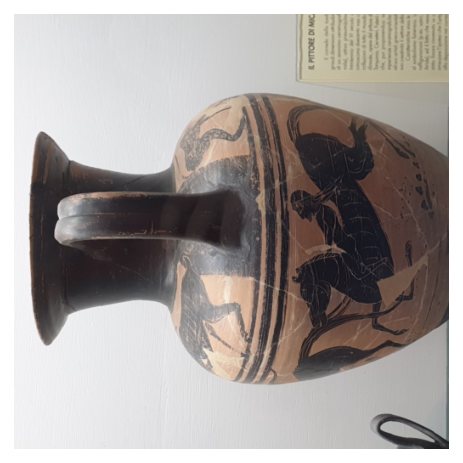

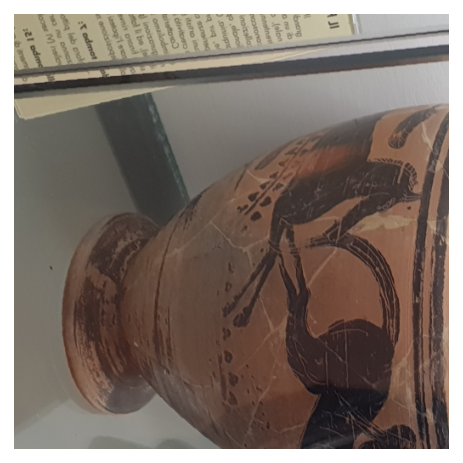

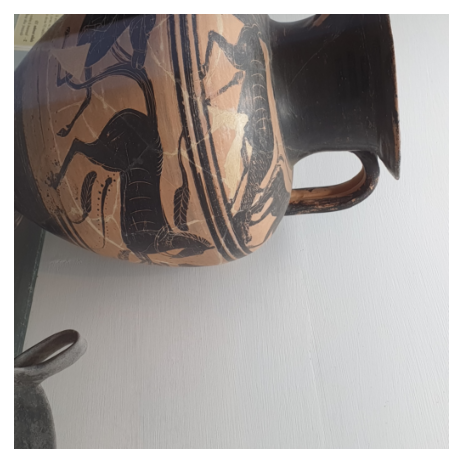

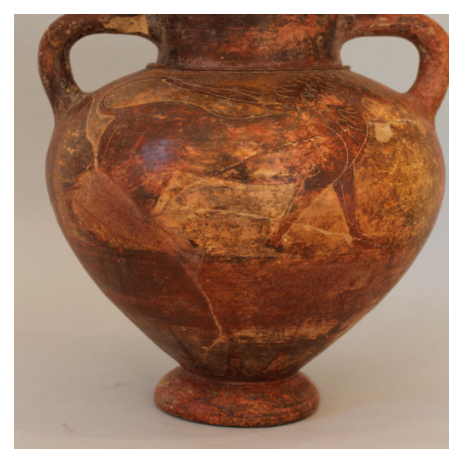

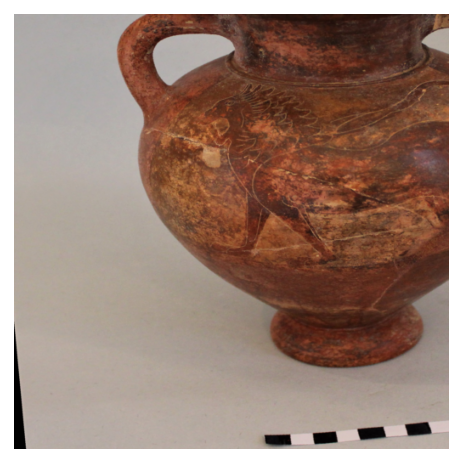

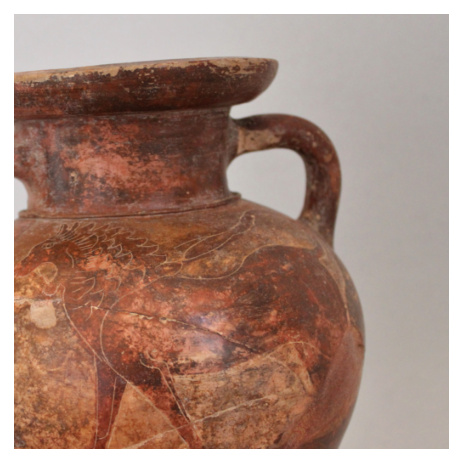

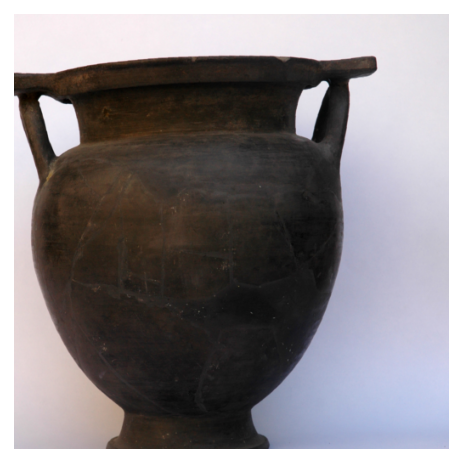

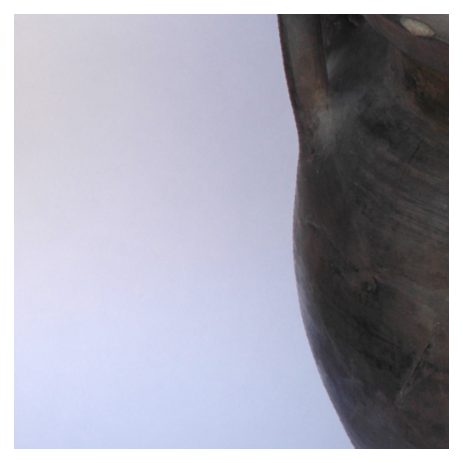

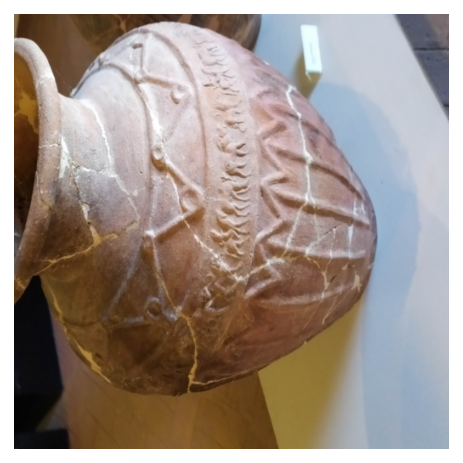

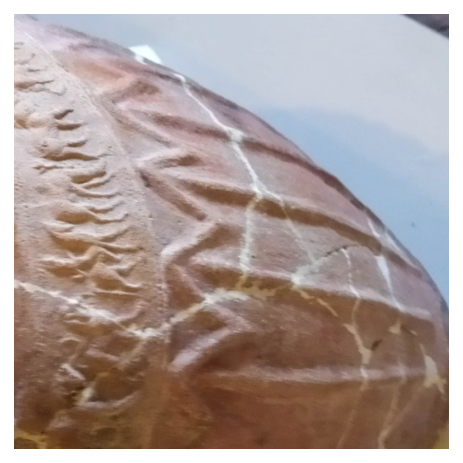

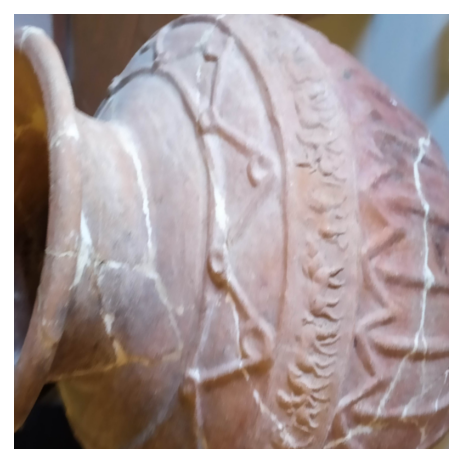

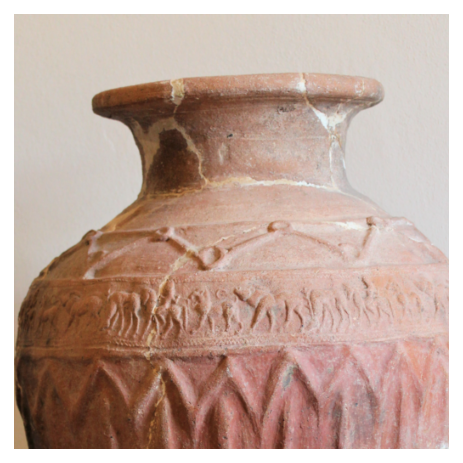

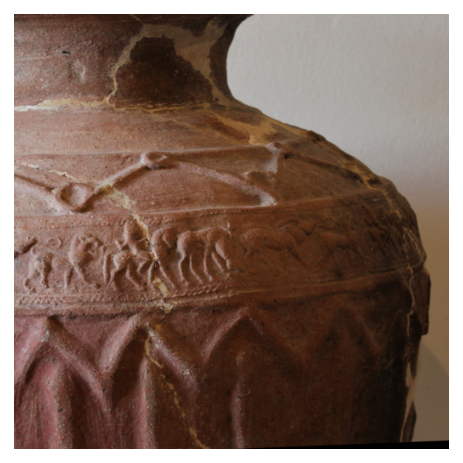

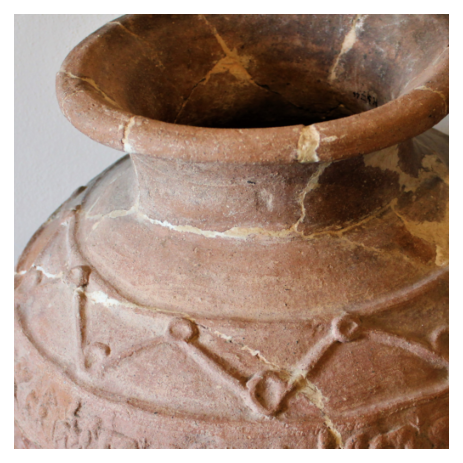

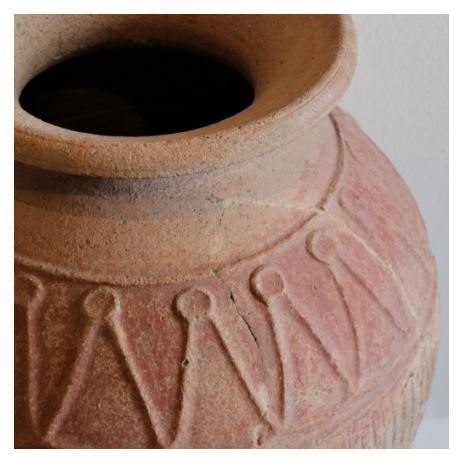

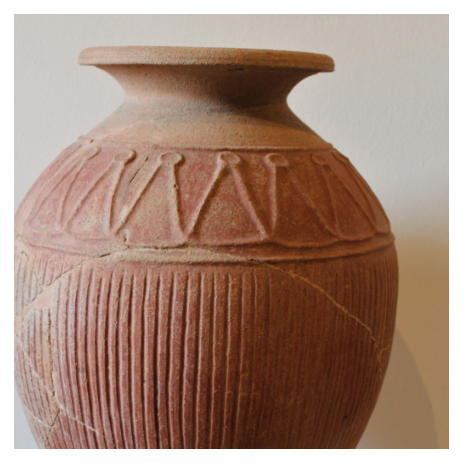

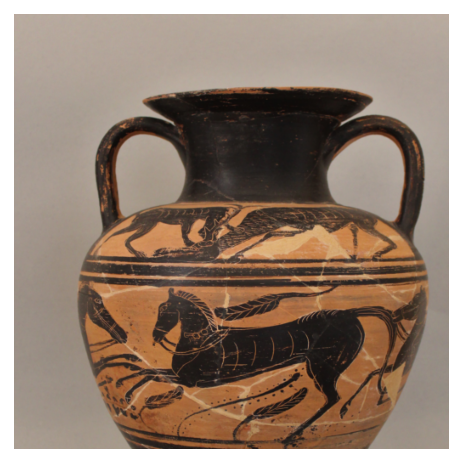

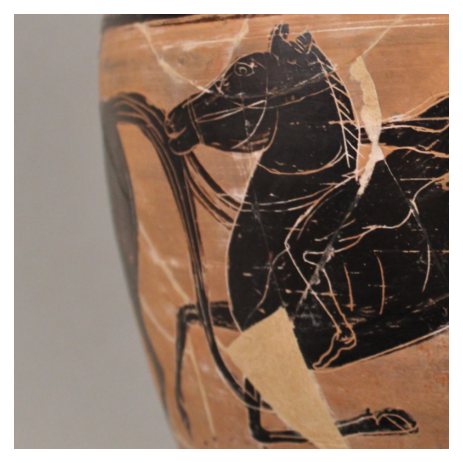

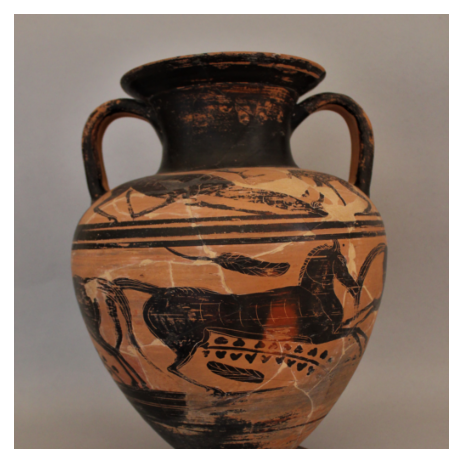

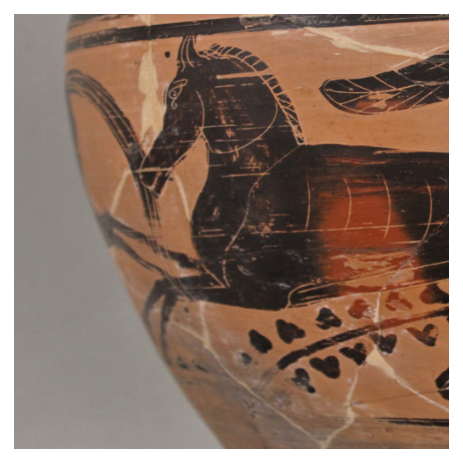

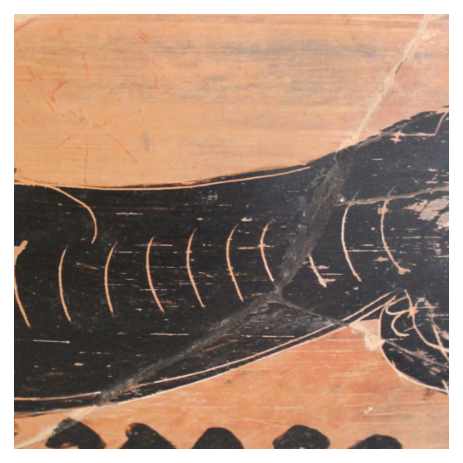

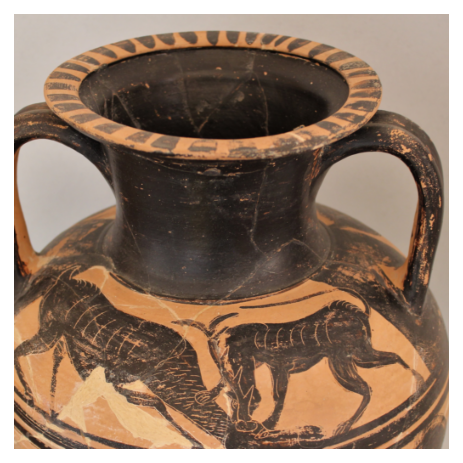

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(image, ax=None):
        if ax is None:
            fig, ax = plt.subplots()
        
	    #numpy().transpose: inverte(o permuta) gli assi di un array, restituendo l’array modificato(in 3D)
        image = image.numpy().transpose((1, 2, 0)) 
 
        ax.imshow(image)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.tick_params(axis='both', length=0)
        ax.set_xticklabels('')
        ax.set_yticklabels('')
        
        return ax

data_iter = iter(dataloader) #iter: permette di scorrere sul dataloader
images, labels = next(data_iter) #next: permette di ottenere i dati su di esso
for i in range(22):
    imshow(images[i], ax=None)